<h1><center>Programming Exercise 1:<br>Linear Regression</center></h1>

In [257]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting
import itertools

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Simple "Octave/Matlab" Function

In [258]:
A = np.identity(5,dtype=int) # default dtype is float
A

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

# 2. Linear Regression with One Variable
- Assignment: As a food truck business owner, use data of population size of a city and profit in that city to help decide in which city the next food truck should be placed. 
- Data in ex1data1.txt:
    - First column: population of a city
    - Second column: profit of food truck in the city

## 2.1 Plotting the Data
- Use a scatter plot to visualize the data

In [259]:
f = open('ex1data1.txt','r') # Could use Python's built-in open function
f.read() # but this is just a long string of the data, including new line characters
f.close()

In [260]:
# Can also use numpy to read that data into an array
# Each row in the txt file will be an entry in the array
f = np.loadtxt('ex1data1.txt',delimiter=',') # delimiting columns by ","
f

array([[  6.1101 ,  17.592  ],
       [  5.5277 ,   9.1302 ],
       [  8.5186 ,  13.662  ],
       [  7.0032 ,  11.854  ],
       [  5.8598 ,   6.8233 ],
       [  8.3829 ,  11.886  ],
       [  7.4764 ,   4.3483 ],
       [  8.5781 ,  12.     ],
       [  6.4862 ,   6.5987 ],
       [  5.0546 ,   3.8166 ],
       [  5.7107 ,   3.2522 ],
       [ 14.164  ,  15.505  ],
       [  5.734  ,   3.1551 ],
       [  8.4084 ,   7.2258 ],
       [  5.6407 ,   0.71618],
       [  5.3794 ,   3.5129 ],
       [  6.3654 ,   5.3048 ],
       [  5.1301 ,   0.56077],
       [  6.4296 ,   3.6518 ],
       [  7.0708 ,   5.3893 ],
       [  6.1891 ,   3.1386 ],
       [ 20.27   ,  21.767  ],
       [  5.4901 ,   4.263  ],
       [  6.3261 ,   5.1875 ],
       [  5.5649 ,   3.0825 ],
       [ 18.945  ,  22.638  ],
       [ 12.828  ,  13.501  ],
       [ 10.957  ,   7.0467 ],
       [ 13.176  ,  14.692  ],
       [ 22.203  ,  24.147  ],
       [  5.2524 ,  -1.22   ],
       [  6.5894 ,   5.9966 ],
       [

In [261]:
# Can further use unpack=True so that the array is transposed and can be unpacked as follows
population,profit = np.loadtxt('ex1data1.txt',delimiter=',',unpack=True)
population
profit

array([ 17.592  ,   9.1302 ,  13.662  ,  11.854  ,   6.8233 ,  11.886  ,
         4.3483 ,  12.     ,   6.5987 ,   3.8166 ,   3.2522 ,  15.505  ,
         3.1551 ,   7.2258 ,   0.71618,   3.5129 ,   5.3048 ,   0.56077,
         3.6518 ,   5.3893 ,   3.1386 ,  21.767  ,   4.263  ,   5.1875 ,
         3.0825 ,  22.638  ,  13.501  ,   7.0467 ,  14.692  ,  24.147  ,
        -1.22   ,   5.9966 ,  12.134  ,   1.8495 ,   6.5426 ,   4.5623 ,
         4.1164 ,   3.3928 ,  10.117  ,   5.4974 ,   0.55657,   3.9115 ,
         5.3854 ,   2.4406 ,   6.7318 ,   1.0463 ,   5.1337 ,   1.844  ,
         8.0043 ,   1.0179 ,   6.7504 ,   1.8396 ,   4.2885 ,   4.9981 ,
         1.4233 ,  -1.4211 ,   2.4756 ,   4.6042 ,   3.9624 ,   5.4141 ,
         5.1694 ,  -0.74279,  17.929  ,  12.054  ,  17.054  ,   4.8852 ,
         5.7442 ,   7.7754 ,   1.0173 ,  20.992  ,   6.6799 ,   4.0259 ,
         1.2784 ,   3.3411 ,  -2.6807 ,   0.29678,   3.8845 ,   5.7014 ,
         6.7526 ,   2.0576 ,   0.47953,   0.20421, 

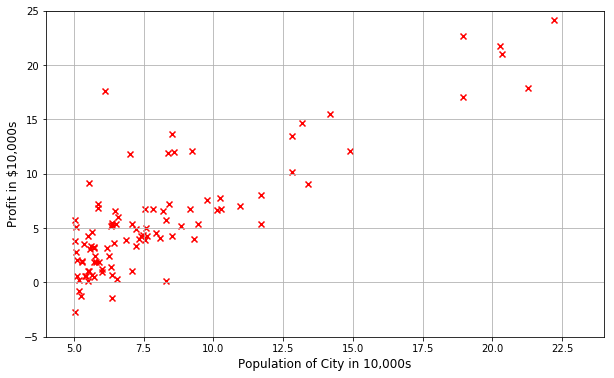

In [262]:
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(population,profit,marker='x',c='r')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xlabel('Population of City in 10,000s',fontsize=12)
plt.ylabel('Profit in $10,000s',fontsize=12)
plt.show()

## 2.2 Gradient Descent
- Fit linear regression parameters $\theta$ to our dataset using GD
- Note that the symbol "$" is a Latex notation wrapper, single dollar sign for inline and double for new line
    - See http://data-blog.udacity.com/posts/2016/10/latex-primer/

In [263]:
# First let's append a column of values of x_0 = 1 to our population array
x0 = np.ones_like(population)
design = np.c_[x0,population] # we have built the "design matrix" (see notes)
design 

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [264]:
def hypothesis(design,theta):
    '''
    Computes the hypothesis fuction which in matrix notation is H = X * Theta
    where X is the m by (n+1) design matrix and Theta is an (n+1) vector of the fit parameters
    Returns H which is an m by 1 matrix 
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    
    Returns
    -------
    hyp: m-dimensional hypothesis function vector 
    '''
    
    hyp = np.dot(design,theta)
    return hyp

In [265]:
def costFunction(design,theta,output):
    '''
    Computes the cost function J = 1/2m*(X*Theta-Y)^T*(X*Theta-Y) which is a function of Theta for a given sample set
    X is the design matrix of shape m by (n+1), Theta is the fit (n+1) parameter vector, and Y is the m output vector
    Returns the scalar J
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    
    Returns
    -------
    costJ: value of the cost function (scalar) 
    '''
    costArg = hypothesis(design,theta) - output
    m = np.shape(design)[0] # sample size
    costJ = 1/(2*m)*np.dot(np.transpose(costArg),costArg)
    return costJ

In [266]:
# Let's initialize the theta vector
theta = np.zeros(np.shape(design)[1]) # Theta is an (n+1) vector
theta

array([ 0.,  0.])

In [267]:
# Test the cost function and hypothesis function
costFunction(design,theta,profit)

32.072733877455669

In [268]:
# As we iterate through different values of theta we want to keep a record of J
history_j = dict.fromkeys(['theta_history','J_history'])

# How many iterations of GD? Learning rate?
iterations = 1500
alpha = 0.01

# Allocate space
history_j['J_history'] = np.empty(iterations)
history_j['theta_history'] = np.empty((iterations,np.shape(theta)[0]))

In [269]:
def gradientDescent(design,theta,output,history_j=None,alpha=0.1,iterations=0):
    '''
    Performs update of (n+1) fit parameters with batch gradient descent method, i.e
        Theta_J := Theta_j - alpha*dJ/dTheta_j for j=0,2,..,n
                 = Theta - X^T*(X*Theta-Y)
        
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    history_j (optional): dictionary with key "theta_history" where we keep all values of theta vector as we iterate
    alpha: scalar learning rate
    iterations: number of iterations
    '''
    print('Initial values:')
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
    print('\tCost Function J: {}'.format(costFunction(design,theta,output)))
    m = np.shape(design)[0] # sample size
    
    # Step through parameter space
    for ii_iter in range(iterations):
        theta[:] = theta - (alpha/m)*np.dot(np.transpose(design),hypothesis(design,theta)-output) # [:] will assign values to the elements of the theta array and thus will change the original array
                                                                                                  # if we do theta = tem_theta instead, the value it pointed to before the assignment in this function will remain unchanged
        if history_j is not None: # if we've provided a dictionary, save the respective value
            history_j["theta_history"][ii_iter] = theta
            history_j["J_history"][ii_iter] = costFunction(design,theta,output)
    
    print('\nAfter {} iterations, final values:'.format(iterations))
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
        
    print('\tCost Function J: {}'.format(costFunction(design,theta,output)))

In [270]:
gradientDescent(design,theta,profit,history_j,alpha,iterations)

Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Cost Function J: 32.07273387745567

After 1500 iterations, final values:
	Theta_0: -3.63029143940436
	Theta_1: 1.166362350335582
	Cost Function J: 4.483388256587726


In [271]:
# Let's check theta
theta

array([-3.63029144,  1.16636235])

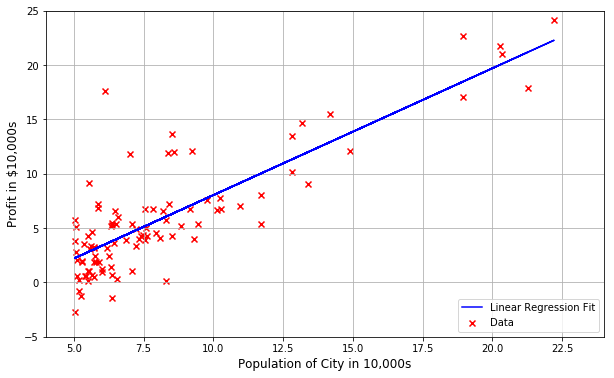

In [272]:
# Plot the fit to the data
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(population,profit,marker='x',c='r',label='Data')
plt.plot(population,hypothesis(design,theta),'-b',label='Linear Regression Fit')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xlabel('Population of City in 10,000s',fontsize=12)
plt.ylabel('Profit in $10,000s',fontsize=12)
plt.legend(loc='lower right',fontsize='medium')
plt.show()

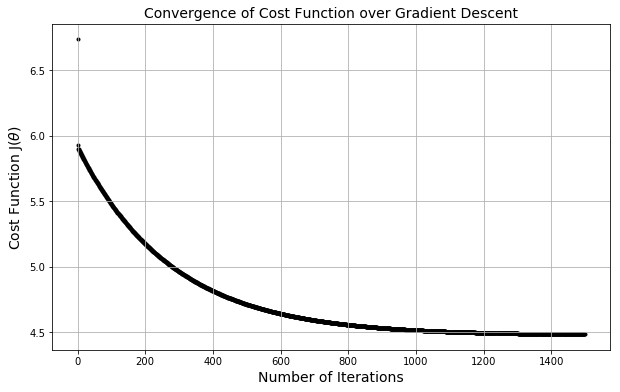

In [273]:
# Plot the values of the cost function over iterations of GD
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(np.arange(iterations),history_j['J_history'],marker='.',c='k')
plt.xlabel("Number of Iterations",fontsize=14)
plt.ylabel("Cost Function J($\\theta$)",fontsize=14)
plt.title("Convergence of Cost Function over Gradient Descent",fontsize=14)
plt.show()

In [274]:
# Now we visualize the cost function over a range of values for theta_0 and theta_1

theta0_min, theta0_max = -10, 10
theta1_min, theta1_max = -1, 4
h = 0.075 # step size in grid
theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max, h),np.arange(theta1_min, theta1_max, h))
costJ = np.empty((np.shape(theta0)[0],np.shape(theta0)[1])) # allocate space for cost function over grid

# Since the function costFunction() was not written to expect and "x" and a "y" but rather a theta_i = [x_i,y_i]
# I can't call it directly with the mesh grid values. Rather I will loop through the values and evaluate it at each point
for idx_theta0,ii_theta0 in enumerate(theta0[0,:]):
    for idx_theta1,ii_theta1 in enumerate(theta1[:,0]):
        temp_theta = np.array([ii_theta0,ii_theta1])
        costJ[idx_theta1][idx_theta0] = costFunction(design,temp_theta,profit) # Note that this is the way that a grid function will be called
                                                                               # i.e y's are the rows and x's are the column values of z

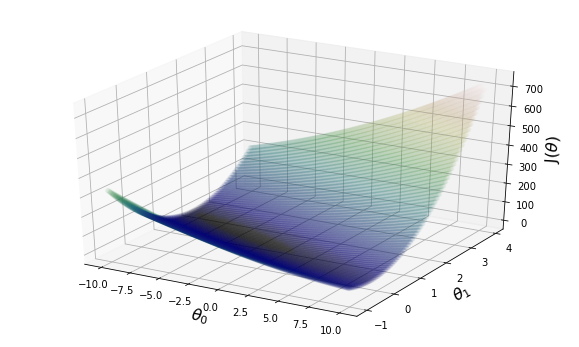

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta0,theta1,costJ,c=np.abs(costJ),cmap=plt.cm.gist_earth,alpha=0.05) # the color map specified in cmap will be applied to the range of values given in c
plt.xlabel('$\\theta_0$',fontsize=16)
plt.ylabel('$\\theta_1$',fontsize=16)
ax.set_zlabel('J($\\theta$)',fontsize=16)
plt.show()

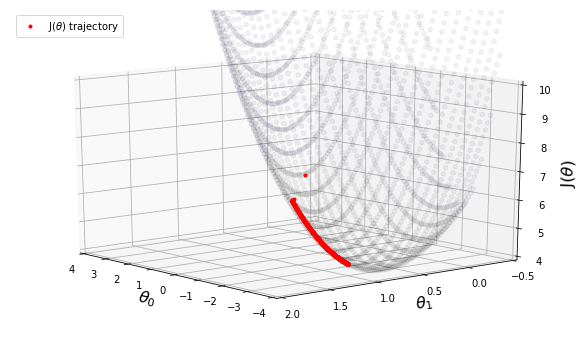

In [276]:
# Now include J's path through the iterations (in red)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta0,theta1,costJ,c=np.abs(costJ),cmap=plt.cm.gist_earth,alpha=0.05)
plt.plot(history_j['theta_history'][:,0],history_j['theta_history'][:,1],history_j['J_history'],'.r',label="J($\\theta$) trajectory")
plt.xlabel('$\\theta_0$',fontsize=16)
plt.ylabel('$\\theta_1$',fontsize=16)
ax.set_zlabel('J($\\theta$)',fontsize=16)
ax.set_zlim(4,10)
ax.set_xlim(-4,4)
ax.set_ylim(-0.5,2)
ax.view_init(elev=15,azim=-220) # elev stores the elevation angle in the z plane. azim stores the azimuth angle in the x,y plane
plt.legend(loc='best',fontsize='medium')
plt.show()

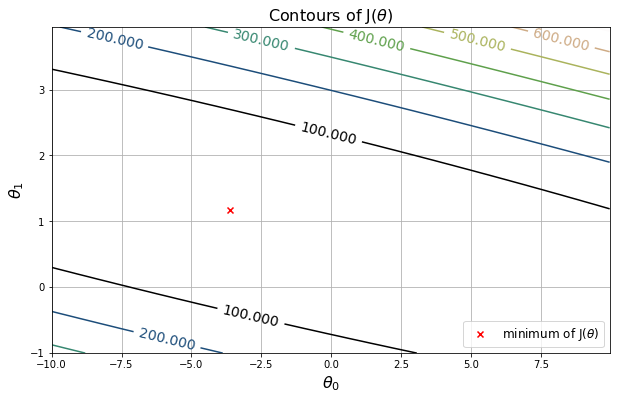

In [277]:
# Contours of J

plt.figure()
plt.grid(True)
CS = plt.contour(theta0,theta1,costJ,cmap=plt.cm.gist_earth) # for filled contour plot use contourf() instead
plt.scatter(history_j['theta_history'][-1][0],history_j['theta_history'][-1][1],marker='x',c='r',label='minimum of J($\\theta$)')
plt.clabel(CS, inline=True, fontsize=14) # labels; inline controls wether contour below label gets removed
plt.xlabel('$\\theta_0$',fontsize=16)
plt.ylabel('$\\theta_1$',fontsize=16)
plt.title('Contours of J($\\theta$)',fontsize=16)
plt.legend(loc='lower right',fontsize=12)
plt.show()

In [284]:
# Predictions of this model

optimal_theta = history_j['theta_history'][-1]
sample_1 = np.array([1,35000])
sample_2 = np.array([1,70000])

print('For population = 35,000, we predict a profit of $ {:0.2f}k'.format(hypothesis(sample_1,optimal_theta)/1e3));
print('For population = 70,000, we predict a profit of $ {:0.2f}k'.format(hypothesis(sample_2,optimal_theta)/1e3));

For population = 35,000, we predict a profit of $ 40.82k
For population = 70,000, we predict a profit of $ 81.64k


# 3. Linear Regression with Multiple Variables
- Assignment: You are selling your house and you want to know what a good market price would be according to the house's size and the number of bedrooms
- Data in ex1data2.txt:
    - First column: size of the house (in square feet)
    - Second column: number of bedrooms 
    - Third column: price of the house

In [321]:
# Loading data
size,num_bedrooms,price = np.loadtxt('ex1data2.txt',delimiter=',',unpack=True)

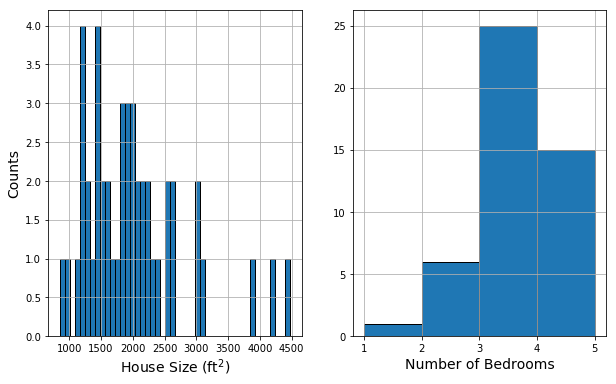

In [322]:
# Supposedly the features need normalization. Let's take a look at how they're distributed

plt.figure()
plt.subplot(1,2,1)
plt.grid(True)
plt.hist(size,bins=len(np.diff(np.sort(size))),ec='k') # "ec" is edgecolor
plt.xlabel('House Size (ft$^2$)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.subplot(1,2,2)
plt.grid(True)
plt.xlabel('Number of Bedrooms',fontsize=14)
plt.hist(num_bedrooms,bins=4,ec='k')
plt.show()

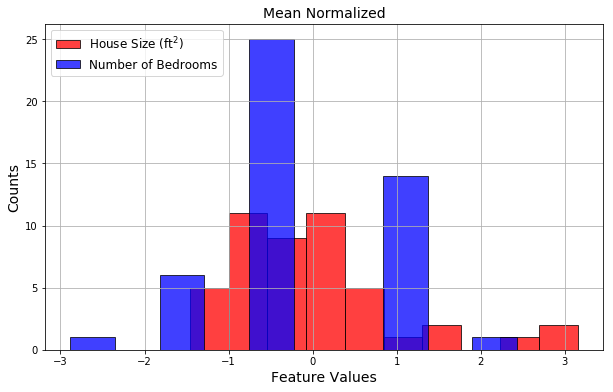

In [323]:
# Since the features have very different ranges, we perform mean normalization i.e subtract the mean and divide by standard deviation

size_avg,size_std = np.mean(size),np.std(size) # save these to normalize a later sample for prediction
size = (size-size_avg)/size_std
num_bavg,num_bstd = np.mean(num_bedrooms),np.std(num_bedrooms) # save these to normalize a later sample for prediction
num_bedrooms = (num_bedrooms-num_bavg)/num_bstd

plt.figure()
plt.grid(True)
plt.hist(size,ec='k',color='r',alpha=0.75,label='House Size (ft$^2$)')
plt.hist(num_bedrooms,ec='k',color='b',alpha=0.75,label='Number of Bedrooms')
plt.xlabel('Feature Values',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.title('Mean Normalized',fontsize=14)
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [324]:
# Build the design matrix
x0 = np.ones_like(size)
design = np.c_[x0,size,num_bedrooms]

# Initialize theta vector with zeros
theta = np.zeros(np.shape(design)[1])

# Initialize new history dict
history_j = dict.fromkeys(['theta_history','J_history'])

# How many iterations of GD? Learning rate?
iterations = 1500
alpha = 0.01

# Allocate space
history_j['J_history'] = np.empty(iterations)
history_j['theta_history'] = np.empty((iterations,np.shape(theta)[0]))

In [325]:
# Perform gradient descent
gradientDescent(design,theta,price,history_j,alpha,iterations)

Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 65591548106.45744

After 1500 iterations, final values:
	Theta_0: 340412.563014392
	Theta_1: 109370.05670466014
	Theta_2: -6500.61509506683
	Cost Function J: 2043282709.9327548


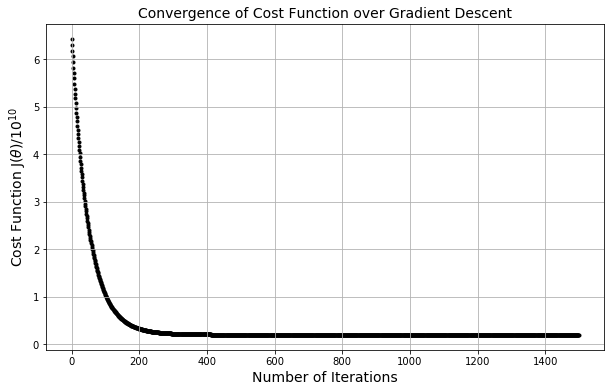

In [326]:
# Plot the values of the cost function over iterations of GD
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(np.arange(iterations),history_j['J_history']/1e10,marker='.',c='k')
plt.xlabel("Number of Iterations",fontsize=14)
plt.ylabel("Cost Function J($\\theta$)/$10^{10}$",fontsize=14)
plt.title("Convergence of Cost Function over Gradient Descent",fontsize=14)
plt.show()

In [327]:
# Let's try different learning rates and see the evolution of the cost function

alpha_list = [0.3,0.1,0.03,0.01]
iterations = 1500
histories_j = dict.fromkeys([str(ii_alpha) for ii_alpha in alpha_list])

for ii_alpha in alpha_list:
    print('----For learning rate alpha of {}----'.format(ii_alpha))
    theta = np.zeros(np.shape(design)[1]) # initialize theta to 0's for every alpha
    histories_j[str(ii_alpha)] = {'J_history':np.empty(iterations),'theta_history':np.empty((iterations,np.shape(theta)[0]))}
    gradientDescent(design,theta,price,histories_j[str(ii_alpha)],ii_alpha,iterations) # perform GD
    print('\n')

----For learning rate alpha of 0.3----
Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 65591548106.45744

After 1500 iterations, final values:
	Theta_0: 340412.65957446804
	Theta_1: 109447.7964696418
	Theta_2: -6578.354854161255
	Cost Function J: 2043280050.6028285


----For learning rate alpha of 0.1----
Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 65591548106.45744

After 1500 iterations, final values:
	Theta_0: 340412.65957446786
	Theta_1: 109447.79646964172
	Theta_2: -6578.3548541612045
	Cost Function J: 2043280050.6028285


----For learning rate alpha of 0.03----
Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 65591548106.45744

After 1500 iterations, final values:
	Theta_0: 340412.65957446716
	Theta_1: 109447.79634182513
	Theta_2: -6578.354726344567
	Cost Function J: 2043280050.6028285


----For learning rate alpha of 0.01----
Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Func

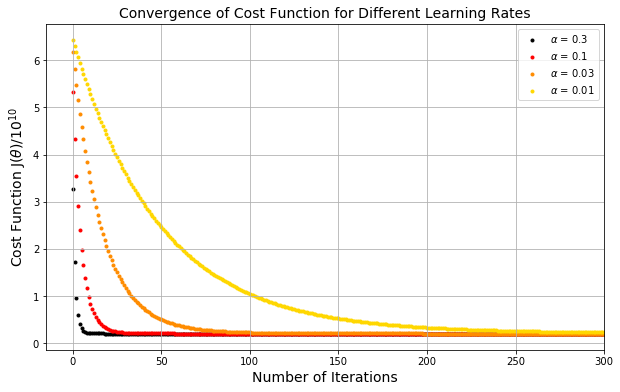

In [328]:
# Plot J's vs iterations for all the learning rates

color_list = ['k','r','darkorange','gold']

plt.figure()
plt.clf()
plt.grid(True)
for idx_alpha,ii_alpha in enumerate(alpha_list):
    label = '$\\alpha$ = {}'.format(ii_alpha)
    plt.scatter(np.arange(iterations),histories_j[str(ii_alpha)]['J_history']/1e10,marker='.',c=color_list[idx_alpha],label=label)
plt.xlabel("Number of Iterations",fontsize=14)
plt.ylabel("Cost Function J($\\theta$)/$10^{10}$",fontsize=14)
plt.title("Convergence of Cost Function for Different Learning Rates",fontsize=14)
plt.legend(loc='upper right',fontsize='medium')
plt.xlim(-15,300)
plt.show()

- It seems that $\alpha$ = 0.1 is a good learning rate so let's pick this to make our prediction

In [348]:
# Predictions of this model

optimal_theta = histories_j['0.1']['theta_history'][-1]
sample_1 = np.array([1,1650,3],dtype=float) # House of 1650 sq ft with 3 bedrooms

# Let's mean normalize this sample, that is we assume it came from the distribution we normalized above
sample_1[1] = (sample_1[1]-size_avg)/size_std
sample_1[2] = (sample_1[2]-num_bavg)/num_bstd

print('For size = 1650 and number of bedrooms = 3, we predict a profit of $ {:0.2f}k'.format(hypothesis(sample_1,optimal_theta)/1e3));

For size = 1650 and number of bedrooms = 3, we predict a profit of $ 293.08k


In [349]:
# Now let's find the optimal theta using the solution to the normal equation
def normEq(design,output):
    '''
    Computes the solution to the normal equation Theta = (X^T*X)^-1*X^T*Y
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    output: m-dimensional output vector
    
    Returns
    -------
    theta: (n+1) fit parameter vector 
    '''
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(design.T,design)),design.T),output) # .T is the same as np.transpose()   
    return theta

In [351]:
# For the normal equation we DO NOT need to use feature scaling but it doesn't matter either way

optimal_theta = normEq(design,price)

print('For size = 1650 and number of bedrooms = 3, we predict a profit of $ {:0.2f}k'.format(hypothesis(sample_1,optimal_theta)/1e3));

For size = 1650 and number of bedrooms = 3, we predict a profit of $ 293.08k
